<a href="https://colab.research.google.com/github/jwphantom/tree-growth-simulator/blob/main/TP_Proba.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [245]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
import seaborn as sns
import math

1 - 

a) Ecriture du simulateur d'un similuteur de la loi bruit

b) Code du calcul de la densité

c) Code du des probabilités

d) Code du calcul des quantiles

In [246]:
#supposons le paramètre thêta = 1 
t = 0.4

In [247]:
#initialisation du seed à 13
seed = 13

In [248]:
# a) Simulateur de la loi du bruit
def invForest(x):
    r = []
    for i in x:
        if(i<0):
            return r.append(0)
        elif(i>0 and i<1):
            Result=(-1/t)*math.log(1-i)
            r.append(Result)
    return r

In [249]:
# b) fonction de densité
def dForest(x):
    p=t*x
    if(x<0):
        return 0
    return t*math.exp(-p)

In [250]:
# c) fonction de probabilité
def pForest(q):
    return frForest(q)

In [251]:
# d) fonction des quantiles
def qForest(p):
    return(invForest(p))

In [252]:
# Fonction de répartition.
def frForest(x):
    print(x)
    p=x*t
    if(x<0):
        return 0
    result= 1-math.exp(-p)
    return result

2- Test des fonctions , répresenation des histogrammes d'un jeu tiré de vos simulations


In [253]:
# a) Generateur des variables alatoire
def randomForest(n):
    
    u= np.random.uniform(size=n)
    return (invForest(u))

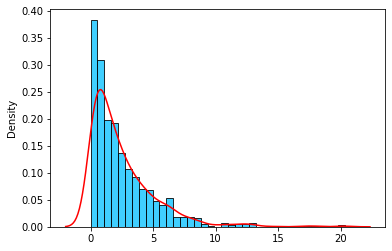

In [254]:
# b) Tracer de l'histogramme 

g = randomForest(1000)

sns.histplot(g, color='deepskyblue', stat='density')
sns.kdeplot(g, color='red')
plt.show()

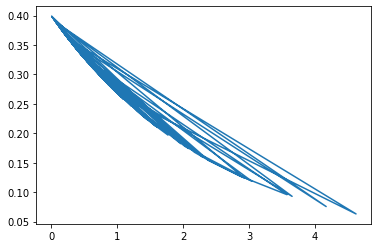

In [255]:
# c) Test de la fonction de densité


#Fonction qui injecte n valeur dans la fonction de densité
def injectValue(x):
    r = []
    for i in x:
        r.append(dForest(i))
    return r

#récuparation dans un tableau pour traçer la fonction du bruit.

def plotBruit(n):
  x = np.random.exponential(size=n)
  y = injectValue(x)

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotBruit(100)


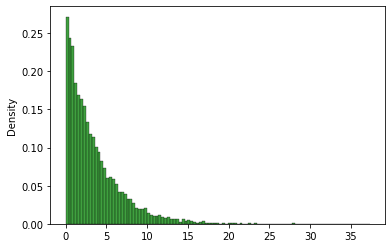

In [256]:
# c) Tracé de la loi exponentielle 

# Using exponential() method
s= np.random.seed(seed)


gfg = np.random.exponential(3.45, 10000)

sns.histplot(gfg, color='green', stat='density')
plt.show()

3- 

a) Ecrivons le code du modèle

In [244]:

from scipy.stats import multivariate_normal


# Fonction du modèle
def model():
  D = 150
  r = 0.3
  s= np.random.seed(seed)

  # calcul de X0 et X1
  X0 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[0]
  X1 = multivariate_normal.rvs([10., 12.], [[1.1, 0.5], [0.5, 1.1]], size = 1)[1]

  X = []
  X.append(X0)
  X.append(X1)

  #ep_k = np.random.lognormal(size=50, mean=0, sigma=.002)
  ep_k = randomForest(50)
  for i in range(2,50):    
    m = D**(1-np.exp(-r))*((X[i-1]+X[i-1])/2)**(np.exp(-r)) * ep_k[i-1]
    X.append(m)

  return X   



b)  Affichons les valeurs en cm de la taille de l'arbre

In [257]:
print(model()) 

[10.224326730071578, 12.287272573038988, 87.77717850127726, 258.7280651699519, 718.9511899983828, 42.705198412597944, 52.40867398506572, 10.374900530611674, 100.83178520278204, 130.36681921346198, 384.95122146227436, 223.19449144954373, 214.975209299761, 4.630079976021642, 12.650276582780739, 178.76863102451844, 104.95738574342882, 110.75038058185314, 748.289676230225, 39.99159621122381, 9.478083648965828, 48.173732883323936, 334.63302732341026, 5.948304200749221, 47.1196667747977, 266.50384532811944, 45.199116842769, 164.75667619121978, 286.1584283399272, 395.5688431115271, 2395.090933545466, 0.03514015011544607, 0.21749477856271493, 3.685470131321253, 9.448580846593496, 15.686079960193796, 83.70458759955956, 610.4380786473296, 297.3634022225937, 381.4261151884267, 218.37664351612278, 236.23959308222754, 487.0515555550702, 1328.0994984869674, 132.69493277528304, 396.76959753038017, 612.5802283563843, 157.90776467804506, 40.50366810952569, 40.06009079324475]


4) 

 a) l’abre atteindra la plus grande valeur : oui

 b) Quelle est cette valeur : 2500m

 c) Plus grande variation entre deux annéees :
 
 d) Année d'observation de ces marges : 


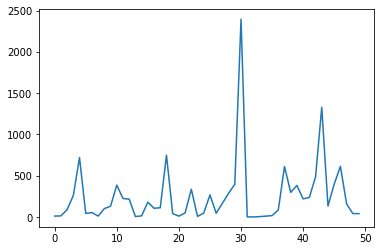

In [258]:

def plotModel():
  x = range(50)
  y = model()

  fig, ax = plt.subplots()
  ax.plot(x, y)
  plt.show()

plotModel()

5) Similation de 50 réalisations sur 50 années

